# **Assignment 1 - Computational Mathematics**
by sabina abdikhalikova SE-2320

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import cmath

**Task 1: Graphical method and absolute error.**

Problem:
1. Plot the graph of the function f(x)=x^(3)−2x^(2)−5 in the range x∈[1,4].
2. Using the graph, find the approximate value of the root.
3. Calculate the value of f(x), where x is the found approximate value of the root.
4. Find the absolute error between the approximate value of the root and the true value (using any other
method for the exact solution).

Required:

1. Plot a graph.
2. Give a detailed calculation of the absolute error.
3. Explain why the graphical root search method is only approximate.

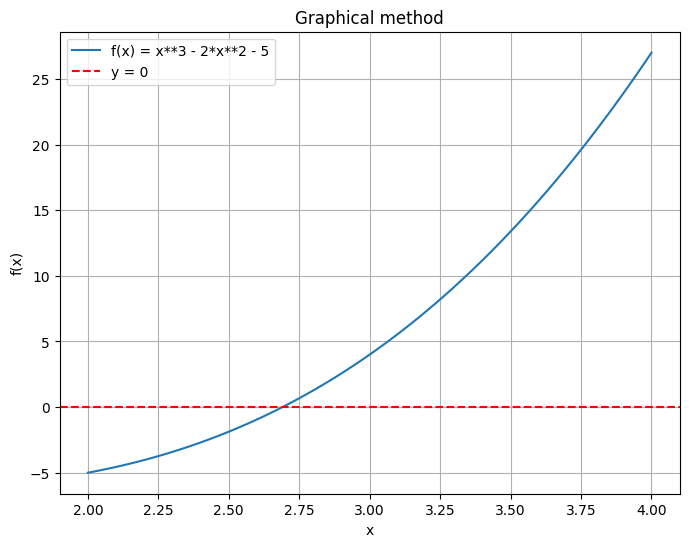

In [171]:
def f(x):
    return x**3 - 2*x**2 - 5

x = np.linspace(2, 4, 100)
y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = x**3 - 2*x**2 - 5")
plt.axhline(0, color='red', linestyle='--', label="y = 0")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graphical method")
plt.legend()
plt.grid()
plt.show()


In [172]:
def bisection_method(f, a, b, tol):
    if f(a) * f(b) >= 0:
        print("Invalid initial values. f(a) and f(b) must be of different signs.")
        return None

    midpoint = (a + b) / 2
    while abs(f(midpoint)) > tol:
        if f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        midpoint = (a + b) / 2

    return midpoint

def f(x):
    return x**3 - 2*x**2 - 5

root = bisection_method(f, 1, 3, 1e-6)
approx_root = 2.69 
print(f"Approximate root: {approx_root}")
print(f"The exact meaning of the root: {root}")
absolute_error = abs(root - approx_root)
print(f"Absolute error: {absolute_error}")

Approximate root: 2.69
The exact meaning of the root: 2.6906473636627197
Absolute error: 0.0006473636627197799


**Task 2: Comparison of root finding methods.**

Problem:
1. Find the root of the equation f(x)=ex−2x−3 in the interval [0,2] using the following methods:
- Bisection method.
- Secant method.
2. For each method, measure the number of iterations required to achieve an accuracy of 10−6.
3. Calculate the relative error for both methods with respect to the exact value of the root.

Required:

1. Write functions for each method.
2. Print the number of iterations and the exact value of the root.
3. Explain which method is more efficient and why.

In [173]:
def f(x):
    return np.exp(x) - 2*x - 3

    
def bisection_method(f, a, b, tol):
    iterations = 0
    if f(a) * f(b) >= 0:
        print("Invalid initial values. f(a) and f(b) must be of different signs.")
        return None

    midpoint = (a + b) / 2
    while abs(f(midpoint)) > tol:
        iterations +=1
        if f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        midpoint = (a + b) / 2

    return midpoint, iterations

def secant_method(f, x0, x1, tol):
    iterations = 0
    while abs(f(x1)) > tol:
        x_temp = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))  
        x0, x1 = x1, x_temp
        iterations+=1
    return x1, iterations

a, b = 0, 2

root_bisection, iter_bisection = bisection_method(f, a, b, 1e-6)
print(f"Bisection method: Root = {root_bisection}, Iterations = {iter_bisection}")

root_secant, iter_secant = secant_method(f, a, b, 1e-6)
print(f"Secant method: Root = {root_secant}, Iterations = {iter_secant}")

exact_root = root_bisection
relative_error_bisection = abs(exact_root - root_bisection) / abs(exact_root)
relative_error_secant = abs(exact_root - root_secant) / abs(exact_root)

print(f"Relative error (bisection): {relative_error_bisection:.6e}")
print(f"Relative error (secants): {relative_error_secant:.6e}")

if iter_bisection > iter_secant and relative_error_bisection > relative_error_secant:
    print("The secant method is more efficient in terms of iterations.")
else:
    print("The bisection method is more stable, but requires more iterations.")

Bisection method: Root = 1.9239387512207031, Iterations = 18
Secant method: Root = 1.923938694754772, Iterations = 5
Relative error (bisection): 0.000000e+00
Relative error (secants): 2.934913e-08
The bisection method is more stable, but requires more iterations.


**Task 3: Newton-Raphson Method and Error Estimation.**

Problem:
1. Using the Newton-Raphson method, find the root of the equation f(x)=x2−3x+2, starting with the initial
guess x0=2.5.
2. Calculate the absolute and relative errors at each iteration step.
3. Plot a convergence graph, where the iteration number is plotted on the x-axis and the absolute error is
plotted on the y-axis.

Required:

1. Provide a table of iterations with the current guess, absolute and relative errors.
2. Explain how the choice of the initial guess affects the convergence of the method

Iteration 1: x = 2.125, Absolute Error = 0.375, Relative Error = 0.17647058823529413
Iteration 2: x = 2.0125, Absolute Error = 0.11249999999999982, Relative Error = 0.05590062111801233
Iteration 3: x = 2.0001524390243905, Absolute Error = 0.012347560975609628, Relative Error = 0.006173309961130947
Iteration 4: x = 2.000000023230574, Absolute Error = 0.0001524157938166404, Relative Error = 7.620789602314362e-05
Newton-Raphson method: Root = 2.000000023230574, Iterations = 4
Errors at each iteration: 
Abs: [0.375, 0.11249999999999982, 0.012347560975609628, 0.0001524157938166404] 
Rel: [0.17647058823529413, 0.05590062111801233, 0.006173309961130947, 7.620789602314362e-05]


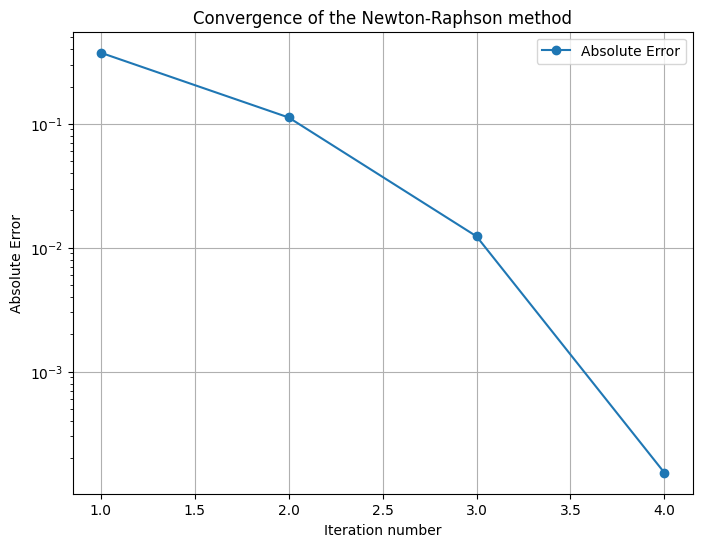

In [174]:
def newton_raphson(f, df, x0, tol):
    x = x0
    iterations = 0
    abs_errors = []
    rel_errors = []
    while abs(f(x)) > tol:
        x_new = x - f(x) / df(x)  
        abs_error = abs(x_new - x)
        abs_errors.append(abs_error)  
        rel_error = abs_error / abs(x_new) if x_new != 0 else 0
        rel_errors.append(rel_error)   
        iterations += 1
        print(f"Iteration {iterations}: x = {x_new}, Absolute Error = {abs_error}, Relative Error = {rel_error}")
        
        x = x_new

    return x, iterations, abs_errors, rel_errors

def f(x):
    return x**2 - 3*x + 2

def df(x):
    return 2*x - 3

x0 = 2.5
root_newton, iter_newton, abs_errors, rel_errors = newton_raphson(f, df, x0, 1e-6)

print(f"Newton-Raphson method: Root = {root_newton}, Iterations = {iter_newton}")
print("Errors at each iteration:", "\nAbs:", abs_errors,"\nRel:", rel_errors)

plt.figure(figsize=(8, 6))
plt.plot(range(1, iter_newton + 1), abs_errors, marker='o', label='Absolute Error')
plt.yscale('log') 
plt.title("Convergence of the Newton-Raphson method")
plt.xlabel("Iteration number")
plt.ylabel("Absolute Error") 
plt.grid()
plt.legend()
plt.show()

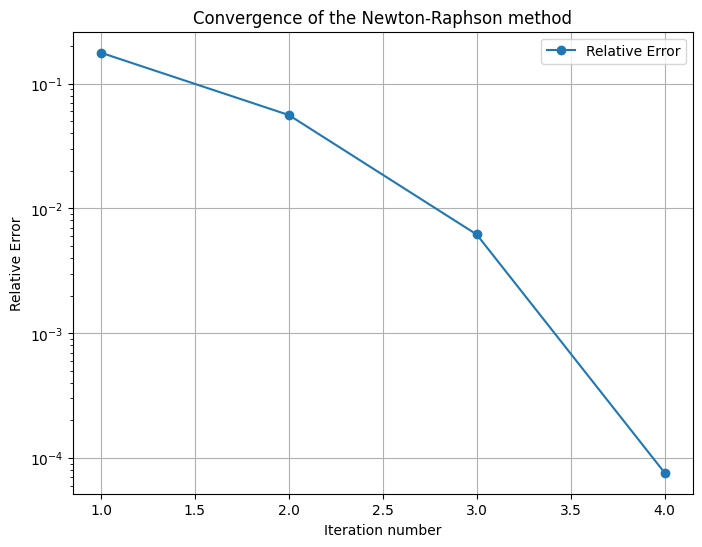

In [175]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, iter_newton + 1), rel_errors, marker='o', label='Relative Error')
plt.yscale('log') 
plt.title("Convergence of the Newton-Raphson method")
plt.xlabel("Iteration number")
plt.ylabel("Relative Error") 
plt.grid()
plt.legend()
plt.show()

**Task 4: Muller's Method and Complex Roots.**

Problem:
1. Find one of the roots (including complex roots) for the function f(x)=x3+x2+x+1 using Muller's method,
starting with the initial approximations x0=-1, x1=0, x2=1.
2. Check the result by substituting the found root value into the function.
3. Calculate the absolute error between the calculated value of f(x) and 0.

Required:

1. Explain how Muller's method handles complex roots.
2. Provide an interpretation of the result

In [176]:
def muller_method(f, x0, x1, x2, tol, max_iter=100):
    for _ in range(max_iter):
        h0 = x1 - x0
        h1 = x2 - x1
        delta0 = (f(x1) - f(x0)) / h0
        delta1 = (f(x2) - f(x1)) / h1
        a = (delta1 - delta0) / (h1 + h0)
        b = a * h1 + delta1
        c = f(x2)

        discriminant = cmath.sqrt(b**2 - 4*a*c)
        if abs(b + discriminant) > abs(b - discriminant):
            denominator = b + discriminant
        else:
            denominator = b - discriminant

        x3 = x2 - (2 * c) / denominator  

        if abs(x3 - x2) < tol:  
            return x3
        x0, x1, x2 = x1, x2, x3

    print("The method did not converge within the specified number of iterations.")
    return None

def f(x):
    return x**3 - x**2 + x + 1

root = muller_method(f, -1, 0, 1, 1e-6)
f_root_value = f(root)
absolute_error = abs(f_root_value - 0)
print(f"Root: {root} \nFunction Value at Root: {f_root_value},\nAbsolute Error: {absolute_error}")


Root: (0.7718445063460759-1.1151425080399628j) 
Function Value at Root: (-1.687538997430238e-13-4.729550084903167e-14j),
Absolute Error: 1.7525622122777635e-13


**Task 5: Error estimation when using False position method.**

Problem:
1. Find the root of the equation f(x)=x2−2x using the False position method.
2. Calculate the absolute and relative errors after each iteration.
3. Plot a graph of the absolute error as a function of the iteration number.

Required:

1. Explain why the false position method converges more slowly than the Newton-Raphson method

Iteration 1: c = -0.3037974683544304, Absolute Error = 2.6962025316455698, Relative Error = 8.875
Iteration 2: c = -0.5055524065612824, Absolute Error = 0.20175493820685203, Relative Error = 0.39907818771780595
Iteration 3: c = -0.6256242229879854, Absolute Error = 0.12007181642670295, Relative Error = 0.1919232216636996
Iteration 4: c = -0.692378477576951, Absolute Error = 0.06675425458896567, Relative Error = 0.09641295440404066
Iteration 5: c = -0.7280751711451935, Absolute Error = 0.035696693568242455, Relative Error = 0.0490288571605799
Iteration 6: c = -0.7467650590890417, Absolute Error = 0.018689887943848182, Relative Error = 0.025027801872047235
Iteration 7: c = -0.7564421305471484, Absolute Error = 0.0096770714581067, Relative Error = 0.01279287742884852
Iteration 8: c = -0.7614236678828574, Absolute Error = 0.004981537335709052, Relative Error = 0.006542398858654135
Iteration 9: c = -0.7639803913114029, Absolute Error = 0.0025567234285455154, Relative Error = 0.0033465825270

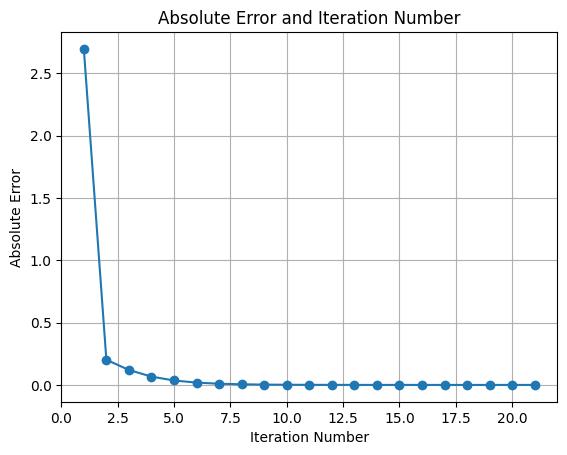

Root: -0.7666638315213565, 
Iterations: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [177]:
def false_position_method(f, a, b, tol):
    if f(a) * f(b) >= 0:
        print("Invalid initial values. f(a) and f(b) must be of different signs.")
        return None

    c1 = a
    false_abs_errors = []
    false_rel_errors = []
    false_iteration = 0
    false_iterations = []

    while True:
        c = b - f(b) * (b - a) / (f(b) - f(a))  

        false_abs_error = abs(c - c1)
        false_rel_error = false_abs_error / abs(c) if c != 0 else float('inf')

        false_abs_errors.append(false_abs_error)
        false_rel_errors.append(false_rel_error)

        false_iteration += 1
        false_iterations.append(false_iteration)

        print(f"Iteration {false_iteration}: c = {c}, Absolute Error = {false_abs_error}, Relative Error = {false_rel_error}")

        if false_abs_error < tol:
            break
        
        c1 = c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        

    return c, false_abs_errors, false_rel_errors, false_iterations

def f(x):
    return x**2 - 2**x

# x**2 - 2**x ==> For example: 1 and 3
# f(1) = -1 and f(3) = 1

root, false_abs_errors, false_rel_errors, false_iterations  = false_position_method(f, -3, 0, 1e-6)
plt.plot(false_iterations, false_abs_errors, marker='o')
plt.xlabel("Iteration Number")
plt.ylabel("Absolute Error")
plt.title("Absolute Error and Iteration Number")
plt.grid(True)
plt.show()
print(f"Root: {root}, \nIterations: {false_iterations}")

Iteration 1: c = -0.3037974683544304, Absolute Error = 2.6962025316455698, Relative Error = 8.875
Iteration 2: c = -0.5055524065612824, Absolute Error = 0.20175493820685203, Relative Error = 0.39907818771780595
Iteration 3: c = -0.6256242229879854, Absolute Error = 0.12007181642670295, Relative Error = 0.1919232216636996
Iteration 4: c = -0.692378477576951, Absolute Error = 0.06675425458896567, Relative Error = 0.09641295440404066
Iteration 5: c = -0.7280751711451935, Absolute Error = 0.035696693568242455, Relative Error = 0.0490288571605799
Iteration 6: c = -0.7467650590890417, Absolute Error = 0.018689887943848182, Relative Error = 0.025027801872047235
Iteration 7: c = -0.7564421305471484, Absolute Error = 0.0096770714581067, Relative Error = 0.01279287742884852
Iteration 8: c = -0.7614236678828574, Absolute Error = 0.004981537335709052, Relative Error = 0.006542398858654135
Iteration 9: c = -0.7639803913114029, Absolute Error = 0.0025567234285455154, Relative Error = 0.0033465825270

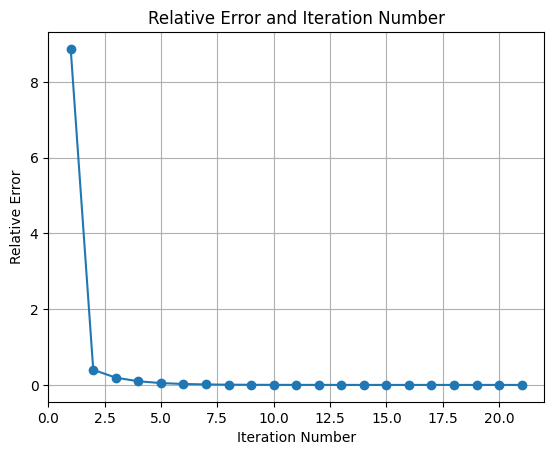

In [178]:
root, false_abs_errors, false_rel_errors, false_iterations  = false_position_method(f, -3, 0, 1e-6)
plt.plot(false_iterations, false_rel_errors, marker='o')
plt.xlabel("Iteration Number")
plt.ylabel("Relative Error")
plt.title("Relative Error and Iteration Number")
plt.grid(True)
plt.show()

**Task 6: Iteration method and errors.**

Problem:
1. Solve the equation f(x)=x**2−6x+5 using the iteration method. Transform the equation into the form
x=g(x).
2. Perform 10 iterations, starting with the initial value x0=0.5.
3. Find the absolute error at each iteration, comparing the result with the true root.

Required:

1. Explain how the choice of function g(x) affects convergence.

In [3]:
def fixed_point_iteration(g, x0,  true_x, tol, max_iter):
    x = x0
    it_abs_errors = []
    
    for i in range(max_iter):
        x_next = g(x)
        # (x**2) - 6*x +5 = (x-1)(x-5) ==> x1 = 1; x2 = 5; 
        it_abs_error = abs(x_next - true_x)
        it_abs_errors.append(it_abs_error)
        if abs(x_next - x) < tol: 
            return x_next
        x = x_next
        print(f" Iteration: {i+1}\n Root:{x}\n Abs Error: {it_abs_error}")
    print("The method did not converge within the specified number of iterations.")
    return None
# g(x) = x For example: x = (x**2+5)/6 for 1 or x = (6x -5)/x for 5
def g(x):
    return (x**2+5)/6 

def f(x):
    return (x**2) - 6*x +5
true_x = 1
root = fixed_point_iteration(g, 0.5, true_x, 1e-6, 10) #we need 12 iteration for result
print(f"Root: {root}\nTrue root: {true_x}")

 Iteration: 1
 Root:0.875
 Abs Error: 0.125
 Iteration: 2
 Root:0.9609375
 Abs Error: 0.0390625
 Iteration: 3
 Root:0.9872334798177084
 Abs Error: 0.01276652018229163
 Iteration: 4
 Root:0.9957716572788303
 Abs Error: 0.004228342721169676
 Iteration: 5
 Root:0.9985935322399714
 Abs Error: 0.001406467760028618
 Iteration: 6
 Root:0.9995315071052504
 Abs Error: 0.00046849289474959477
 Iteration: 7
 Root:0.9998438722826822
 Abs Error: 0.00015612771731776665
 Iteration: 8
 Root:0.9999479614902048
 Abs Error: 5.203850979518254e-05
 Iteration: 9
 Root:0.9999826542814026
 Abs Error: 1.7345718597350235e-05
 Iteration: 10
 Root:0.9999942181439465
 Abs Error: 5.7818560534883545e-06
The method did not converge within the specified number of iterations.
Root: None
True root: 1
